In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [108]:
n = 270
N = 1024
k = 40
num_iterations = 15
s = 0.2
lambda_ = 0.1

# create sensing matrix A
A = np.sqrt(1/n)*np.random.randn(n, N)
#fade_A = A @ h
alpha = .1
_, Lambda, _ = np.linalg.svd(A)
L = np.max(Lambda) + 1

SNRs = np.array([-12,-10, -5, 1, 5, 10, 20])
SNRs = (10**(SNRs/10))*n
sigma = 1/(np.sqrt(SNRs))
w = sigma[2]*np.random.randn(n).reshape(-1,1)

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

y = A @ x + w

mse_vs_iterations = np.zeros(num_iterations)

In [87]:
# AMP with averaging
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0
ons = 0
mse = 0
num_iterations = 15
mse_vs_iterations = np.zeros(num_iterations)

#AMP
for elm in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    for i in range(100):
        # reset everything for next cycle
        z = np.zeros(y.shape)
        xHt = np.zeros(x.shape)
        r = 0
        tau = 0
        ons = 0
        for idx_iter in range(elm):
            ons = onsager(z, r, tau)
            z = y - A @ xHt + ons
            tau = np.sqrt(1/n) * np.linalg.norm(z)
            r = xHt + A.T @ z
            xHt = eta(r, tau)
        mse += (1/N) * np.sum((x - xHt)**2)
        
    # find the current error
    mse_vs_iterations[elm - 1] = mse / 100
    mse = 0
    
#print(*mse_vs_iterations, sep='\n')

In [88]:
# AMP
mse_vs_iterations_1 = np.zeros(num_iterations)
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0
ons = 0


#AMP
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau)
    z = y - A @ xHt + ons
    tau = np.sqrt(1/n) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)

    # find the current error
    mse_vs_iterations_1[idx_iter] = (1/N) * np.sum((x - xHt)**2)
#print(*mse_vs_iterations_1, sep='\n')

In [89]:
# IST 
mse_vs_iter = np.zeros(num_iterations)
xHt = np.zeros(x.shape)

for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
    # find the current error
    mse_vs_iter[idx_iter] = (1/N) * np.sum((x - xHt)**2)

print(*mse_vs_iter, sep=',')

0.02999004363642614,0.027652207389234323,0.026049093975738666,0.02484787389682845,0.023822983869989253,0.022921294861285184,0.022101139453216186,0.021350445600008962,0.020659029072082308,0.020019029758537494,0.01942433138633054,0.018869630918729344,0.018351574330532087,0.017865317827823905,0.017406749447664113


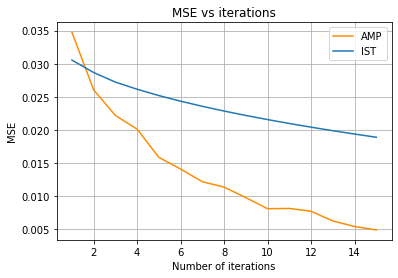

n = 270 | N = 1024 | k = 40
SNR = 10dB


In [52]:

plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 10dB')

In [120]:
num_iterations = 15
alphas = [.05, .1, .15, .2, .25, .3, .35]
mse_aL = []
mse = np.zeros(num_iterations)

for a in alphas:
    xHt = np.zeros(x.shape)
    for idx_iter in range(num_iterations):
        z = y - A @ xHt
        r = xHt + s * A.T @ z
        xHt = eta(r, a/L)
        # find the current error
        mse[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    mse_aL.append(mse)
    mse = np.zeros(num_iterations)

# divide into respective arrays to plot
mse_05 = mse_aL[0]
mse_1 = mse_aL[1]
mse_15 = mse_aL[2]
mse_2 = mse_aL[3]
mse_25 = mse_aL[4]
mse_3 = mse_aL[5]
mse_35 = mse_aL[6]

[0.03118707 0.02957215 0.028547   0.02781428 0.02718757 0.02664305
 0.02615102 0.02570128 0.02528556 0.02488852 0.02450966 0.02415041
 0.02380655 0.02347704 0.02316026]
[array([0.03118707, 0.02957215, 0.028547  , 0.02781428, 0.02718757,
       0.02664305, 0.02615102, 0.02570128, 0.02528556, 0.02488852,
       0.02450966, 0.02415041, 0.02380655, 0.02347704, 0.02316026]), array([0.03081158, 0.02895479, 0.02752759, 0.02651169, 0.02563624,
       0.02486685, 0.02417774, 0.02354987, 0.02297212, 0.02243637,
       0.02193693, 0.0214698 , 0.02103207, 0.02062103, 0.02023354]), array([0.03068116, 0.02867962, 0.02703399, 0.0258357 , 0.02482698,
       0.02395838, 0.02318937, 0.02249623, 0.02186684, 0.02129014,
       0.02075814, 0.02026218, 0.01979817, 0.01936275, 0.01895431]), array([0.03069999, 0.02858974, 0.02683634, 0.02555173, 0.02449546,
       0.02359171, 0.02279806, 0.02209093, 0.02145056, 0.02086838,
       0.02033553, 0.01984847, 0.01940201, 0.0189921 , 0.01861265]), array([0.03089106,

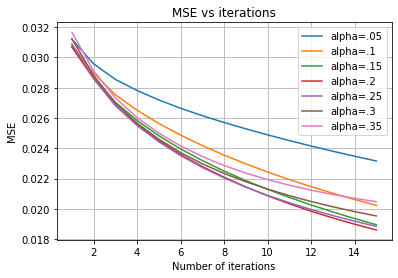

In [121]:
plt.figure()
plt.plot(range(1, num_iterations+1), mse_05, label="alpha=.05")
plt.plot(range(1, num_iterations+1), mse_1, label="alpha=.1")
plt.plot(range(1, num_iterations+1), mse_15, label="alpha=.15")
plt.plot(range(1, num_iterations+1), mse_2, label="alpha=.2")
plt.plot(range(1, num_iterations+1), mse_25, label="alpha=.25")
plt.plot(range(1, num_iterations+1), mse_3, label="alpha=.3")
plt.plot(range(1, num_iterations+1), mse_35, label="alpha=.35")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()

In [118]:
# IST with (alpha / L)
num_iterations = 15
xHt = np.zeros(x.shape)
mse_aL05 = np.zeros(num_iterations)
a = .05
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL05[idx_iter] = (1/N) * np.sum((x - xHt)**2)

xHt = np.zeros(x.shape)
mse_aL1 = np.zeros(num_iterations)
a = .1
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL1[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
xHt = np.zeros(x.shape)
mse_aL15 = np.zeros(num_iterations)
a = .15
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL15[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
xHt = np.zeros(x.shape)
mse_aL2 = np.zeros(num_iterations)
a = .2
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL2[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
xHt = np.zeros(x.shape)
mse_aL25 = np.zeros(num_iterations)
a = .25
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL25[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
xHt = np.zeros(x.shape)
mse_aL8 = np.zeros(num_iterations)
a = .8
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, a/L)
    # find the current error
    mse_aL8[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
print(mse_aL05)

[0.03118707 0.02957215 0.028547   0.02781428 0.02718757 0.02664305
 0.02615102 0.02570128 0.02528556 0.02488852 0.02450966 0.02415041
 0.02380655 0.02347704 0.02316026]


In [20]:
print("ist",mse_vs_iter)
print("amp",mse_vs_iterations)

ist [0.03102829 0.02912001 0.02766944 0.02659145 0.0256547 ]
amp [0.0299412  0.02602259 0.02175443 0.01982523 0.01554304]


In [4]:
h = np.zeros(shape=(N,N))
# creating fading coefficients
# creates NxN array where rows are filled with the same h value
for i in range(N):
    tmp = (random.normalvariate(0, sqrt(.5)) + 1j*random.normalvariate(0, sqrt(.5)))
    for j in range(N):
        h[i][j] = abs(tmp) # for now we only care about real part
#print(h.T)
# h.T makes it so all columns have the same h
#print(h[i])

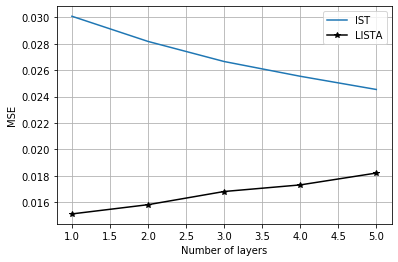

In [15]:
ist = [0.03009368078417604,0.02818373129813704,0.026660348740995973,0.025541677894054704,0.024538892083271365]
lista = [.0151, .0158, .0168, .0173, .0182]
plt.figure()
plt.plot([1,2,3,4,5], ist, label="IST")
plt.plot([1,2,3,4,5], lista,  'k-*', label="LISTA")
plt.xlabel("Number of layers")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()


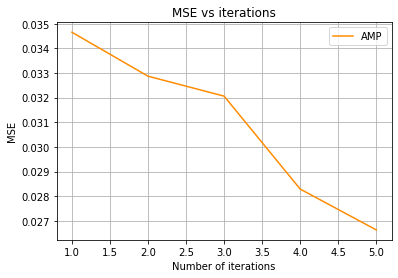

n = 270 | N = 1024 | k = 40


In [32]:
plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')

In [35]:
print(mse_vs_iterations[18:31])
print(mse_vs_iter[18:31])

[0.00195767 0.00159425 0.00138909 0.00118674 0.00102286 0.00088765
 0.00076362 0.00061861 0.00056936 0.00047878 0.000384   0.00035252
 0.00030288]
[0.01622974 0.01581139 0.0154079  0.01501831 0.01464147 0.01427665
 0.01392295 0.01357974 0.01324662 0.01292308 0.01260875 0.01230317
 0.01200537]


In [18]:
#lista10 = [0.02735818363726139, 0.028723379597067833, 0.030329732224345207, 0.030796675011515617, 0.03051833063364029]
# init_alpha = 0.75
lista10 = [0.027224335819482803, 0.02705369144678116, 0.02703084982931614, 0.027027612552046776, 0.02704850770533085]
lista20 = [0.017235206440091133, 0.012382063083350658, 0.010942485183477402, 0.010209700092673302, 0.009579195640981197]
lista30 = [0.0155345369130373, 0.009263429790735245, 0.0066907210275530815, 0.005058402195572853, 0.00397052988409996]
noiseless_lista = [.015, .0094, .006,.0047, .003]

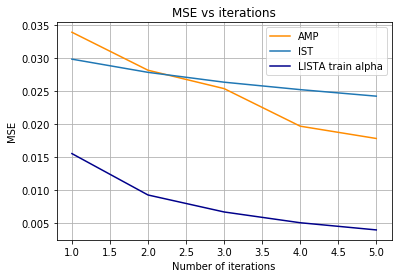

n = 270 | N = 1024 | k = 40
SNR = 30dB


In [81]:
# comparing all three algorithms

plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
#plt.plot(range(1, num_iterations+1), lista30, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 30dB')

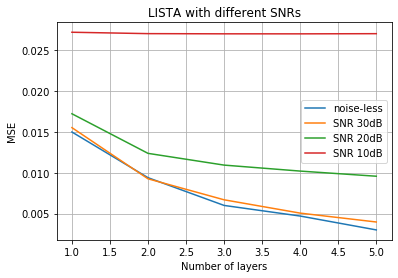

In [19]:
# comparing lista at different noises
plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

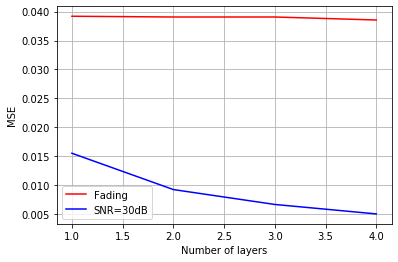

In [118]:
fading_lista = [0.03919283673167229, 0.0390625, 0.03906309977173805, 0.038543883711099625, 26423.841796875]

plt.figure()
plt.plot(range(1,5), fading_lista[:-1], label="Fading", color='red')
plt.plot(range(1,5), lista30[:-1] ,label="SNR=30dB", color='blue')
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.legend()
plt.grid(True, which='both')
plt.show()

# Below values are for when only alpha was trained

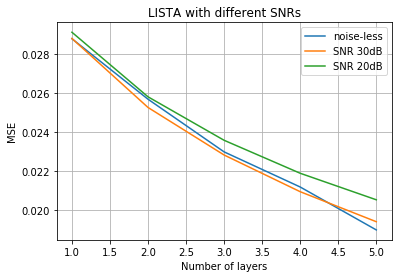

In [64]:
noiseless_lista = [.0288, .0257, .023, .0212, .019]

plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
#plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

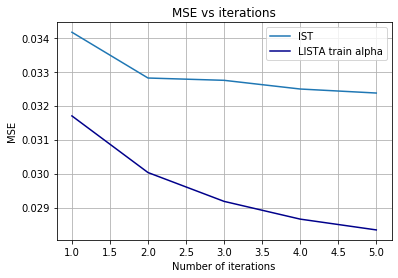

n = 270 | N = 1024 | k = 40
SNR = 10dB


In [60]:
# 30dB
lista30 = [0.028813188895583153, 0.02527638152241707, 0.022840021178126335, 0.020958876237273216, 0.019420886412262917]

#20dB
lista20 = [0.02913258969783783, 0.025823263451457024, 0.023594414815306664, 0.021904321387410164, 0.02054455131292343]

#10db
lista10 = [0.03169730305671692, 0.03002990037202835, 0.029181115329265594, 0.028658872470259666, 0.028340915217995644]

plt.figure()
#plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
plt.plot(range(1, num_iterations+1), lista10, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 10dB')

In [127]:
A = np.array([[2, 5, 11, 17, 23], [3, 7, 13, 19, 29]])
b = np.array([228, 227])
I = 500
# X, err = kaczmarz(A, b, I)

# plt.figure(figsize=(8, 6))
# plt.semilogy(np.arange(1, I + 1), err)

In [138]:
m = A.shape[0]
n = A.shape[1]

v = np.zeros(n) # size n x 1 
X = [] # will append v to this each time
err = []

for i in range(I):
    for j in range(1,m):
        si = (j % m) + 1
        ai = A[si, :]
        v_next = v + ((b[si] - ai*v) / np.linalg.norm(ai)**2) * ai
        err.append(np.linalg.norm((A@v_next - b), np.inf))
        X.append(v_next)
        v = v_next

IndexError: index 2 is out of bounds for axis 0 with size 2

In [137]:
print(err[0:6])

[41.5073477956613, 130.43856220320754, 214.63200347960435, 274.6952932532579, 320.8075987348469, 357.9861041185686]
